#**데이터**

In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import requests
from sklearn.linear_model import LinearRegression

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/trade_data_analysis')

ValueError: Mountpoint must not contain a space.

**1 ~ 4번 데이터** : 광종 / 전망기간 / 예측가격 / 가격 단위

**1번 데이터** : 텅스텐 가격예측(USD/mtu)

**2번 데이터** : 코발트 가격예측(USD/lb)

**3번 데이터** : 망간 가격예측(USD/ton)

**4번 데이터** : 리튬 가격예측(RMB/kg)

**5 ~ 7번 데이터** : 광종 / 기간 / 수급 안정화 지수 / 실질가격 / 가격 단위

**5번 데이터** : 코발트 수급 안정화 지수(유럽 로테르담 기준, 달러/파운드)

**6번 데이터** : 리튬 수급 안정화 지수(탄산리튬 중국 내수가격, RMB/kg)

**7번 데이터** : 니켈 수급 안정화 지수(런던금속거래소 현물기준, 달러/톤)

**8 ~ 9번 데이터** : 광종 / 기간 / 시장 위험 지수


**8번 데이터** : 코발트 시장 위험 지수

**9번 데이터** : 리튬 시장 위험 지수


In [ ]:
# 가격예측파일을 cp949 인코딩 방식으로 읽기
Tungsten_Price = pd.read_csv('텅스텐_가격예측데이터.csv', encoding='cp949') # 2008.01 ~ 2025.10 : 72 * 4 colums
Cobalt_Price = pd.read_csv('코발트_가격예측데이터.csv', encoding='cp949') # 2008.01 ~ 2025.10 : 72 * 4 colums
Mangan_Price = pd.read_csv('망간_가격예측데이터.csv', encoding='cp949') # 2008.01 ~ 2025.10 : 72 * 4 colums
Lithium_Price = pd.read_csv('리튬_가격예측데이터.csv', encoding='cp949') # 2008.01 ~ 2025.10 : 72 * 4 colums

In [ ]:
# 수급화안정화지수/시장위험지수을 cp949 인코딩 방식으로 읽기
Cobalt_StaIndex = pd.read_csv('코발트_수급안정화지수.csv', encoding='cp949') # 2018.01.01 ~ 2023.03.01 : 63 * 5 columns
Lithium_StaIndex = pd.read_csv('리튬_수급안정화지수.csv', encoding='cp949') # 2018.01.01 ~ 2023.03.01 : 63 * 5 columns
Nickel_StaIndex = pd.read_csv('니켈_수급안정화지수.csv', encoding='cp949') # 2018.01.01 ~ 2023.03.01 : 63 * 5 columns
Cobalt_RiskIndex = pd.read_csv('코발트_시장위험지수.csv', encoding='cp949') # 2023.01.08 ~ 2023.12.22 : 183 * 3 columns
Lithium_RiskIndex = pd.read_csv('리튬_시장위험지수.csv', encoding='cp949') # 2023.01.08 ~ 2023.12.22 : 183 * 3 columns

#**결측치 정리**

In [ ]:
print("텅스텐_가격예측데이터.csv의 결측치:")
print(Tungsten_Price.isnull().sum())
print("\n코발트_가격예측데이터.csv의 결측치:")
print(Cobalt_Price.isnull().sum())
print("\n망간_가격예측데이터.csv의 결측치:")
print(Mangan_Price.isnull().sum())
print("\n리튬_가격예측데이터.csv의 결측치:")
print(Lithium_Price.isnull().sum())
print("\n코발트_수급안정화지수.csv의 결측치:")
print(Cobalt_StaIndex.isnull().sum())
print("\n리튬_수급안정화지수.csv의 결측치:")
print(Lithium_StaIndex.isnull().sum())
print("\n니켈_수급안정화지수.csv의 결측치:")
print(Nickel_StaIndex.isnull().sum())
print("\n코발트 시장위험지수.csv의 결측치:")
print(Cobalt_RiskIndex.isnull().sum())
print("\n리튬_시장위험지수.csv의 결측치:")
print(Lithium_RiskIndex.isnull().sum())

텅스텐_가격예측데이터.csv의 결측치:
광종      0
전망기간    0
예측가격    0
가격단위    0
dtype: int64

코발트_가격예측데이터.csv의 결측치:
광종      0
전망기간    0
예측가격    0
가격단위    0
dtype: int64

망간_가격예측데이터.csv의 결측치:
광종      0
전망기간    0
예측가격    0
가격단위    0
dtype: int64

리튬_가격예측데이터.csv의 결측치:
광종      0
전망기간    0
예측가격    0
가격단위    0
dtype: int64

코발트_수급안정화지수.csv의 결측치:
광종                  0
기간                  0
수급안정화지수             0
실질가격(유럽 로테르담 기준)    0
가격단위                0
dtype: int64

리튬_수급안정화지수.csv의 결측치:
광종                    0
기간                    0
수급안정화지수               0
실질가격(탄산리튬 중국 내수가격)    0
가격단위                  0
dtype: int64

니켈_수급안정화지수.csv의 결측치:
광종                    0
기간                    0
수급안정화지수               0
실질가격(런던금속거래소 현물기준)    0
가격단위                  0
dtype: int64

코발트 시장위험지수.csv의 결측치:
광종        0
기간        0
시장위험지수    0
dtype: int64

리튬_시장위험지수.csv의 결측치:
광종        0
기간        0
시장위험지수    0
dtype: int64


#**각 광종별 가격 변동 확인**

In [ ]:
# 텅스텐 ,망간, 코발트, 리튬
combined_data = pd.concat([Tungsten_Price, Cobalt_Price, Mangan_Price, Lithium_Price])
# 인덱스 재설정
combined_data.reset_index(drop=True, inplace=True)
combined_data

,광종,전망기간,예측가격,가격단위
0,텅스텐,2008-01-01,245.10,USD/mtu
1,텅스텐,2008-04-01,250.65,USD/mtu
2,텅스텐,2008-07-01,247.50,USD/mtu
3,텅스텐,2008-10-01,238.88,USD/mtu
4,텅스텐,2009-01-01,209.52,USD/mtu
...,...,...,...,...
283,리튬,2024-10-01,412.01,RMB/kg
284,리튬,2025-01-01,415.62,RMB/kg
285,리튬,2025-04-01,419.97,RMB/kg
286,리튬,2025-07-01,424.21,RMB/kg


In [ ]:
# 열 이름 변경
combined_data.rename(columns={'광종': 'Metal', '전망기간': 'Period', '예측가격': 'Predict_Price', '가격단위': 'Price_unit'}, inplace=True)
# 광종 데이터 변경
combined_data['Metal'].replace({'텅스텐': 'thungsten', '코발트': 'cobalt', '망간': 'mangan', '리튬': 'lithium'}, inplace=True)

In [ ]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
<ipython-input-45-e7cd99de6e69>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels()[::8], rotation=45)


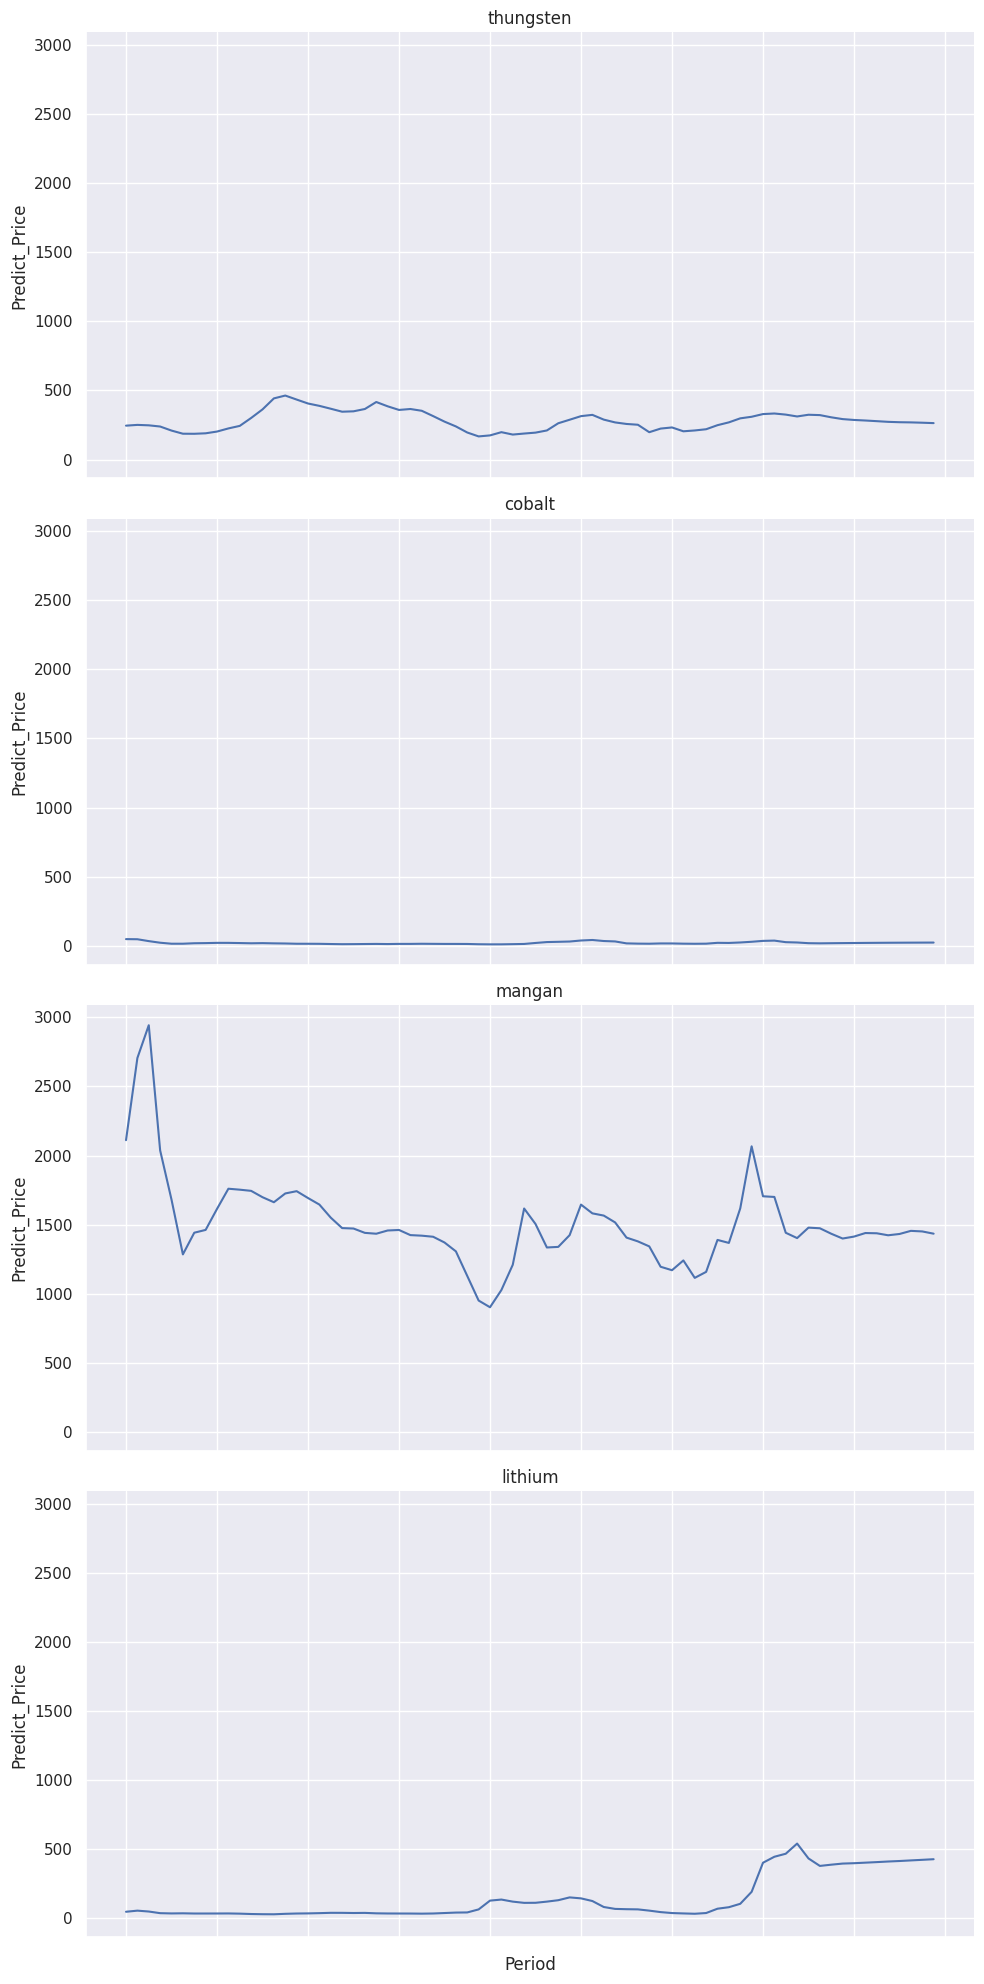

In [ ]:
# 광종별로 추세선을 그래프로 나타내기
sns.set(style="darkgrid")
g = sns.FacetGrid(combined_data, col="Metal", col_wrap=1, height=5, aspect=2)
g.map(sns.lineplot, "Period", "Predict_Price", ci=None)

# x축 간격 설정
g.set_xticklabels(rotation=45)
g.set_xlabels("Period", fontsize=12)
g.set_ylabels("Predict_Price", fontsize=12)
g.set_titles("{col_name}")

# x축 간격 설정
for ax in g.axes:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xticklabels(ax.get_xticklabels()[::8], rotation=45)

plt.tight_layout()
plt.show()

#**망간 시계열 표시**

Significant Peaks and Periods:
    Periods  Peak_Date
2        21 2008-07-01
9        18 2010-04-01
35       15 2016-10-01
55       15 2021-10-01
60       15 2023-01-01
65       12 2024-04-01


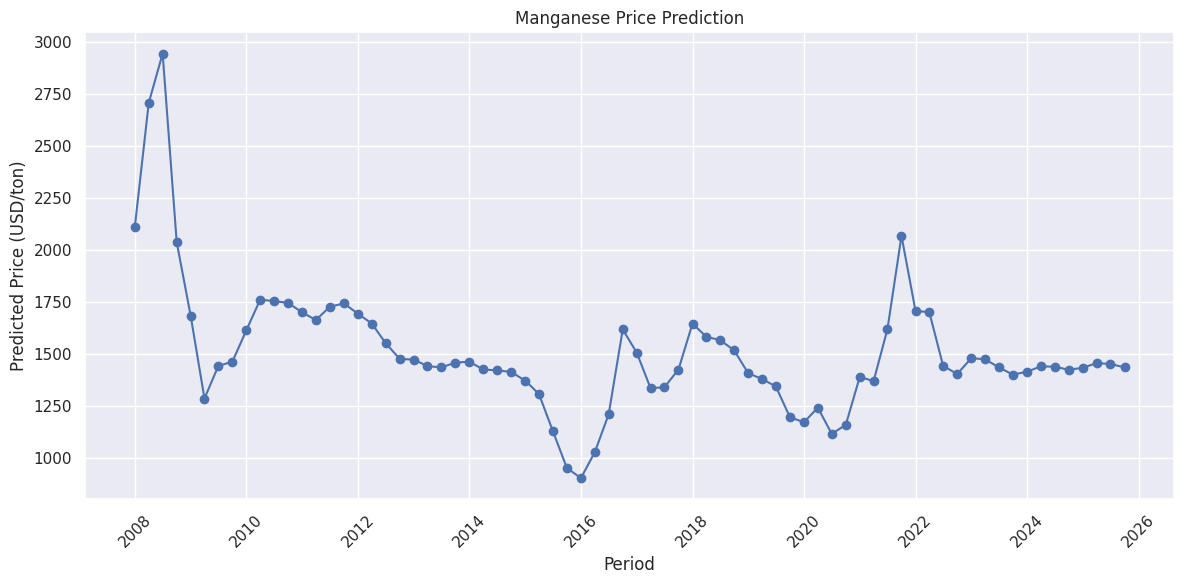

In [ ]:
from scipy.signal import find_peaks
import numpy as np

# 전망기간을 datetime 형식으로 변환
Mangan_Price['전망기간'] = pd.to_datetime(Mangan_Price['전망기간'])

# 예측가격 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(Mangan_Price['전망기간'], Mangan_Price['예측가격'], marker='o', linestyle='-')
plt.title('Manganese Price Prediction')
plt.xlabel('Period')
plt.ylabel('Predicted Price (USD/ton)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 예측가격 피크 찾기
peaks, _ = find_peaks(Mangan_Price['예측가격'])

# 피크 지점에 대한 주기 계산
periods = np.diff(Mangan_Price['전망기간'].iloc[peaks]).astype('timedelta64[D]').astype(int) // 30
period_avg = np.mean(periods)
period_std = np.std(periods)

# 주기적 변동 발생 구간 찾기
peak_periods = pd.DataFrame({'Periods': periods, 'Peak_Date': Mangan_Price['전망기간'].iloc[peaks[:-1]]})
significant_peaks = peak_periods[(peak_periods['Periods'] >= period_avg - period_std) & (peak_periods['Periods'] <= period_avg + period_std)]

print("Significant Peaks and Periods:")
print(significant_peaks)

plt.show()

In [ ]:
# 주기적변동 발생 구간 찾기
peak_periods['Price'] = Mangan_Price['예측가격'].iloc[peaks[:-1]].values

# 증가 구간과 감소 구간 분리
increasing_periods = peak_periods[peak_periods['Price'].diff() > 0]
decreasing_periods = peak_periods[peak_periods['Price'].diff() < 0]

In [ ]:
increasing_periods

,Periods,Peak_Date,Price
35,15,2016-10-01,1617.31
40,27,2018-01-01,1645.58
52,9,2021-01-01,1390.20
55,15,2021-10-01,2067.00


In [ ]:
decreasing_periods

,Periods,Peak_Date,Price
9,18,2010-04-01,1760.38
15,27,2011-10-01,1742.69
24,33,2014-01-01,1462.12
49,9,2020-04-01,1241.92
60,15,2023-01-01,1479.00
65,12,2024-04-01,1439.98


#**코발트 수급안정화지수/시장위험지수 분석**

In [ ]:
# '광종'을 'Metal'로 변경, 나머지 열 삭제
Cobalt_StaIndex.rename(columns={'광종': 'Metal', '기간': 'Period', '수급안정화지수': 'STI', '실질가격(유럽 로테르담 기준)' : 'Price'}, inplace=True)
Cobalt_StaIndex.drop(columns='가격단위', inplace=True)
Cobalt_StaIndex

,Metal,Period,STI,Price
0,코발트,2018-01-01,4.529362,38.261061
1,코발트,2018-02-01,4.151130,39.483260
2,코발트,2018-03-01,3.402340,42.766627
3,코발트,2018-04-01,3.278510,45.242099
4,코발트,2018-05-01,3.417726,44.755291
...,...,...,...,...
58,코발트,2022-11-01,43.708191,24.172023
59,코발트,2022-12-01,47.958913,22.819742
60,코발트,2023-01-01,58.443264,19.949913
61,코발트,2023-02-01,65.709396,17.456173


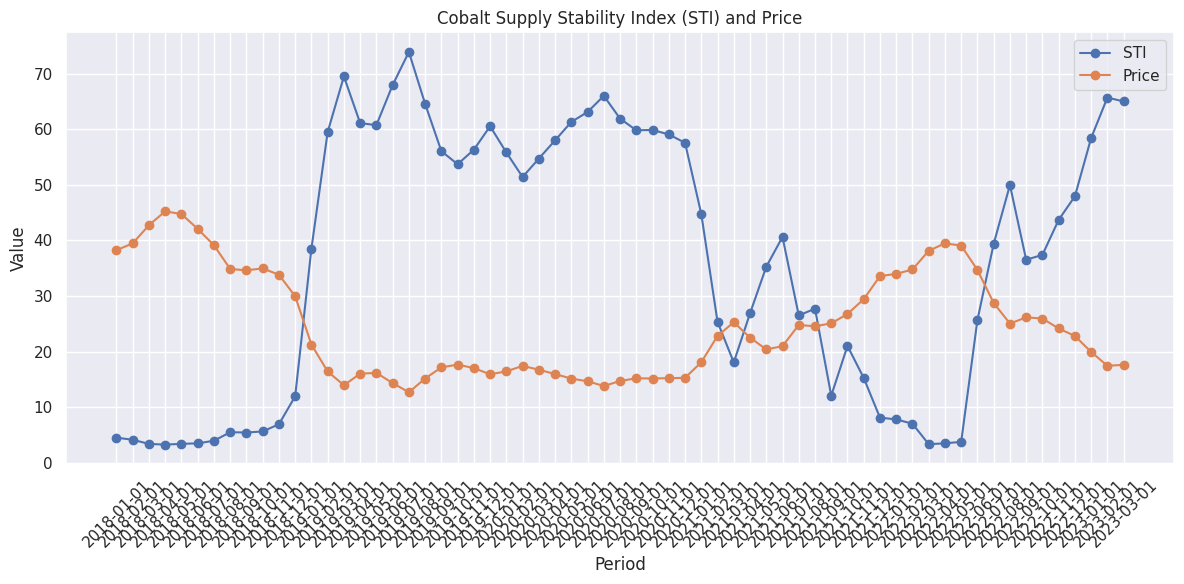

In [ ]:
# STI와 Price의 흐름 추세
plt.figure(figsize=(12, 6))
plt.plot(Cobalt_StaIndex['Period'], Cobalt_StaIndex['STI'], label='STI', marker='o', linestyle='-')
plt.plot(Cobalt_StaIndex['Period'], Cobalt_StaIndex['Price'], label='Price', marker='o', linestyle='-')
plt.title('Cobalt Supply Stability Index (STI) and Price')
plt.xlabel('Period')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation between STI and Price: -0.9374475643187342


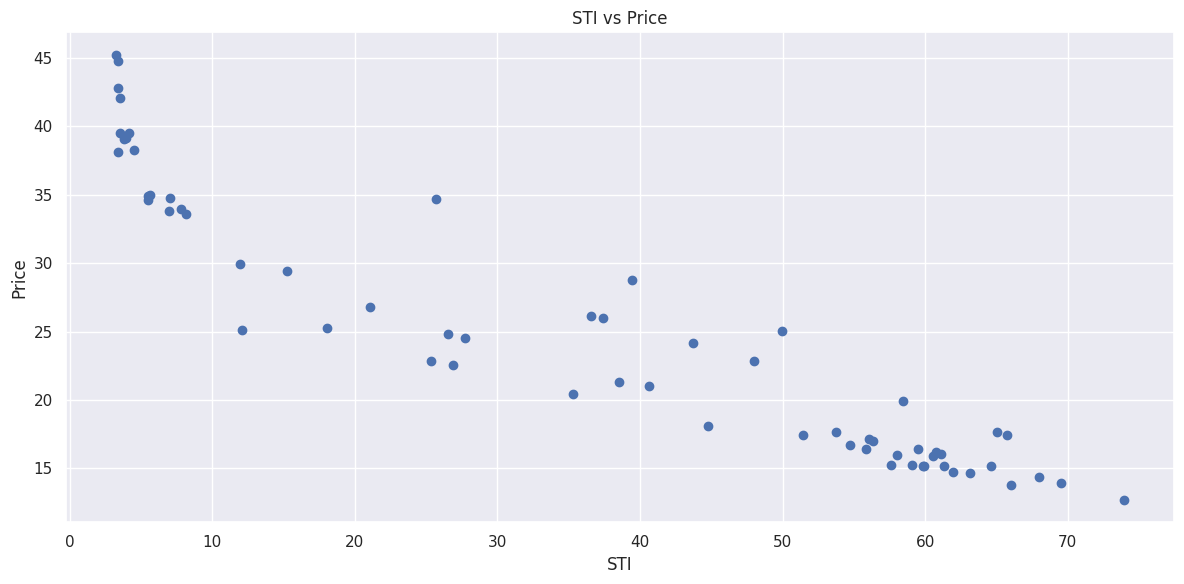

In [ ]:
#STI, Price간 상관관계 찾기
correlation = Cobalt_StaIndex['STI'].corr(Cobalt_StaIndex['Price'])
print("Correlation between STI and Price:", correlation)
plt.figure(figsize=(12, 6))
plt.scatter(Cobalt_StaIndex['STI'], Cobalt_StaIndex['Price'])
plt.title('STI vs Price')
plt.xlabel('STI')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

**상관관계 = -0.9374475643187342(STI와 Price간에 강한 음의 상관관계에 있음**

In [ ]:
Cobalt_Price.rename(columns={'광종': 'Metal', '전망기간': 'Period', '예측가격' : 'Predict_Price'}, inplace=True)
Cobalt_Price.drop(columns='가격단위', inplace=True)
Cobalt_Price

,Metal,Period,Predict_Price
0,코발트,2008-01-01,48.84
1,코발트,2008-04-01,47.88
2,코발트,2008-07-01,34.35
3,코발트,2008-10-01,22.77
4,코발트,2009-01-01,15.51
...,...,...,...
67,코발트,2024-10-01,22.51
68,코발트,2025-01-01,22.89
69,코발트,2025-04-01,23.27
70,코발트,2025-07-01,23.58


In [ ]:
# 두 데이터 프레임을 기간을 기준으로 병합
Cobalt_merged_data = pd.merge(Cobalt_Price, Cobalt_StaIndex, on='Period', how='inner')
Cobalt_merged_data.rename(columns={'Metal_x': 'Metal'}, inplace=True)
Cobalt_merged_data.drop(columns='Metal_y', inplace=True)

Cobalt_merged_data

,Metal,Period,Predict_Price,STI,Price
0,코발트,2018-01-01,38.81,4.529362,38.261061
1,코발트,2018-04-01,42.56,3.278510,45.242099
2,코발트,2018-07-01,35.03,3.973245,39.151816
3,코발트,2018-10-01,32.02,5.642486,34.977694
4,코발트,2019-01-01,18.06,38.521248,21.284372
5,코발트,2019-04-01,16.17,61.115322,16.037885
6,코발트,2019-07-01,15.51,73.916652,12.697461
7,코발트,2019-10-01,17.60,53.719932,17.674404
8,코발트,2020-01-01,17.51,55.836878,16.451828
9,코발트,2020-04-01,15.86,58.017392,15.970499


#**코발트 STI 예측**

In [ ]:
from sklearn.linear_model import LinearRegression

# 독립 변수(Price)와 종속 변수(STI)를 선택
X = Cobalt_StaIndex[['Price']]
y = Cobalt_StaIndex['STI']

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, y)

# 회귀식 기울기와 절편 확인.
slope = model.coef_[0]
intercept = model.intercept_
print("회귀식: STI = {:.2f} * Price + {:.2f}".format(slope, intercept))
# 회귀식 : STI = -2.37 * Price + 95.16

Cobalt_Predict = Cobalt_Price.copy()
# 회귀식의 기울기와 절편을 사용하여 예측한 STI 값을 계산.
predicted_STI = slope * Cobalt_Predict['Predict_Price'] + intercept

# 예측한 STI 값을 Cobalt_Predict 데이터프레임에 추가.
Cobalt_Predict['Predict_STI'] = predicted_STI

Cobalt_Predict

회귀식: STI = -2.37 * Price + 95.16


,Metal,Period,Predict_Price,Predict_STI
0,코발트,2008-01-01,48.84,-20.647728
1,코발트,2008-04-01,47.88,-18.371452
2,코발트,2008-07-01,34.35,13.709814
3,코발트,2008-10-01,22.77,41.167395
4,코발트,2009-01-01,15.51,58.381733
...,...,...,...,...
67,코발트,2024-10-01,22.51,41.783886
68,코발트,2025-01-01,22.89,40.882860
69,코발트,2025-04-01,23.27,39.981834
70,코발트,2025-07-01,23.58,39.246787


In [ ]:
# Cobalt_merged_data와 Cobalt_Predict를 Period를 기준으로 병합.
Comp = pd.merge(Cobalt_merged_data, Cobalt_Predict[['Period', 'Predict_STI']], on='Period', how='inner')

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 예측값(Predict_STI)과 실제값(STI).
predicted_values = Comp['Predict_STI']
actual_values = Comp['STI']

# MSE 및 MAE를 계산.
mse = mean_squared_error(actual_values, predicted_values)
mae = mean_absolute_error(actual_values, predicted_values)

print("평균제곱오차 (MSE):", mse)
print("평균절대오차 (MAE):", mae)

평균제곱오차 (MSE): 68.97895196022728
평균절대오차 (MAE): 6.31159001142652


**MSE(평균제곱오차)** : 68.98

**MAE(평균절대오차)**: 예측값과 실제값의 평균적인 차이가 약 6.31 정도

So, 해당 자료를 통해 STI를 사용

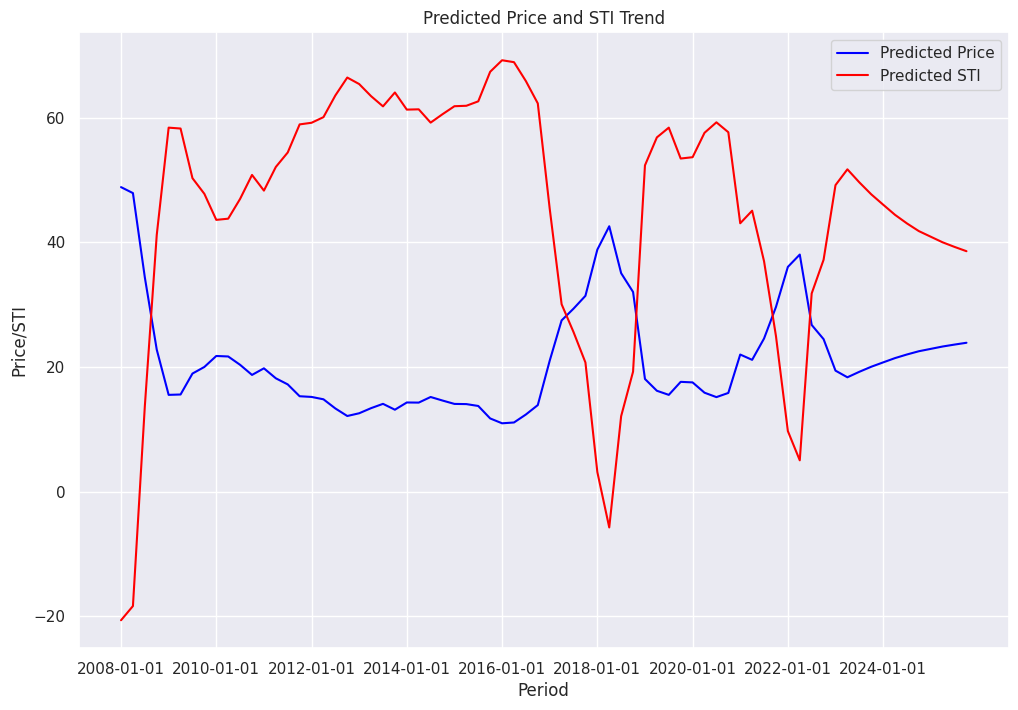

In [ ]:
# 데이터 추출
periods = Cobalt_Predict['Period']
predict_price = Cobalt_Predict['Predict_Price']
predict_sti = Cobalt_Predict['Predict_STI']

# 그래프 그리기
plt.figure(figsize=(12, 8))
plt.plot(periods, predict_price, label='Predicted Price', color='blue')
plt.plot(periods, predict_sti, label='Predicted STI', color='red')

# 그래프 타이틀과 레이블 설정
plt.title('Predicted Price and STI Trend')
plt.xlabel('Period')
plt.ylabel('Price/STI')
plt.legend()

# x축에 2년에 한 개씩만 표시
plt.xticks(periods[::8])

# 그래프 출력
plt.show()

#**시장위험지수(진행중)**

In [ ]:
# '광종', '기간', '시장위험지수' 열을 변경
Cobalt_RiskIndex.rename(columns={'광종': 'Metal', '기간': 'Period', '시장위험지수': 'RI'}, inplace=True)
Cobalt_RiskIndex['Period'] = pd.to_datetime(Cobalt_RiskIndex['Period'])
Cobalt_RiskIndex

,Metal,Period,RI
0,코발트,2023-01-08,0.825372
1,코발트,2023-02-08,0.395299
2,코발트,2023-03-08,0.359196
3,코발트,2023-04-08,0.243827
4,코발트,2023-05-08,0.187337
...,...,...,...
178,코발트,2023-11-22,45.019437
179,코발트,2023-12-22,49.397681
180,코발트,2023-01-23,60.196562
181,코발트,2023-02-23,67.680678


In [ ]:
start_date = '2023-01-08'
end_date = '2023-12-22'

# 각 연속된 기간에 대한 날짜 범위를 생성.
date_ranges = pd.date_range(start=start_date, end=end_date, freq='15D')

existing_periods = Cobalt_RiskIndex['Period'].tolist()

# 새로운 기간만을 선택.
new_periods = [date for date in date_ranges if date not in existing_periods]

new_data = pd.DataFrame({
    'Metal': '코발트',
    'Period': new_periods,
    'RI': None
})

# 새로운 데이터프레임을 기존 데이터와 병합.
Cobalt_RiskIndex_filled = pd.concat([Cobalt_RiskIndex, new_data], ignore_index=True)

# 데이터 정렬.
Cobalt_RiskIndex_filled.sort_values(by='Period', inplace=True)

Cobalt_RiskIndex_filled.reset_index(drop=True, inplace=True)
Cobalt_RiskIndex_filled

,Metal,Period,RI
0,코발트,2023-01-08,0.825372
1,코발트,2023-01-09,55.792876
2,코발트,2023-01-10,41.147416
3,코발트,2023-01-11,52.986157
4,코발트,2023-01-12,66.340848
...,...,...,...
189,코발트,2023-12-18,12.572025
190,코발트,2023-12-19,62.36657
191,코발트,2023-12-20,59.300833
192,코발트,2023-12-21,8.36661


**월별 평균 리스크 추세**

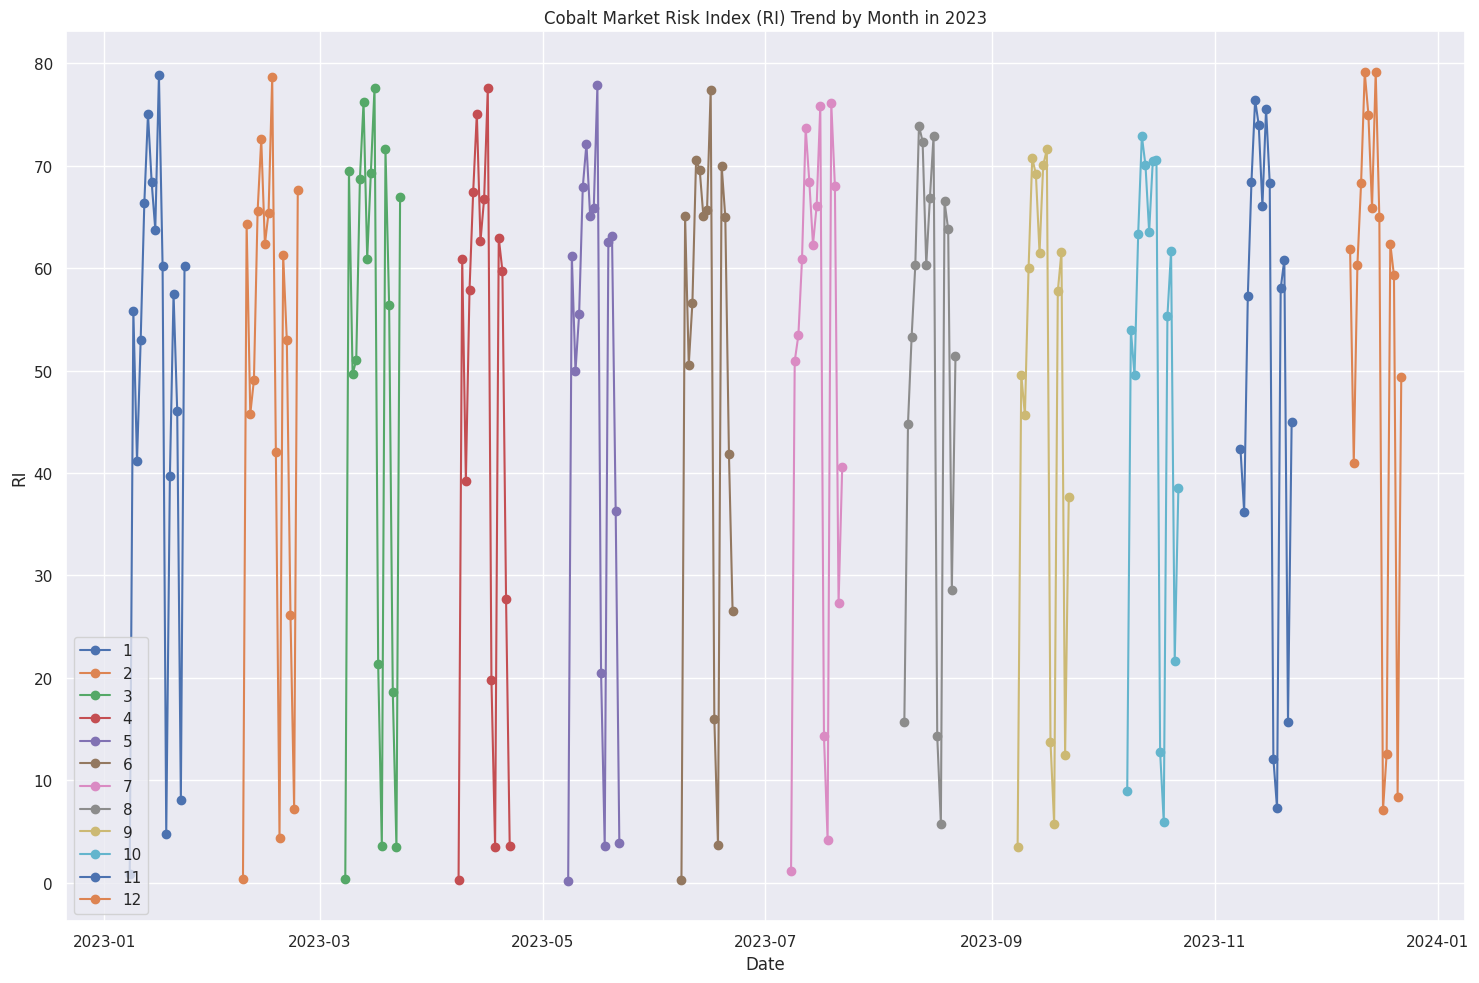

In [ ]:
# 월별 RI 추세 그래프 그리기
plt.figure(figsize=(15, 10))
# 각 월별 그래프 그리기
for month in range(1, 13):
    month_data = Cobalt_RiskIndex_filled[(Cobalt_RiskIndex_filled['Period'].dt.month == month)]
    plt.plot(month_data['Period'], month_data['RI'], marker='o', label=f'{month}')

# 그래프 제목 및 축 레이블 설정
plt.title('Cobalt Market Risk Index (RI) Trend by Month in 2023')
plt.xlabel('Date')
plt.ylabel('RI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

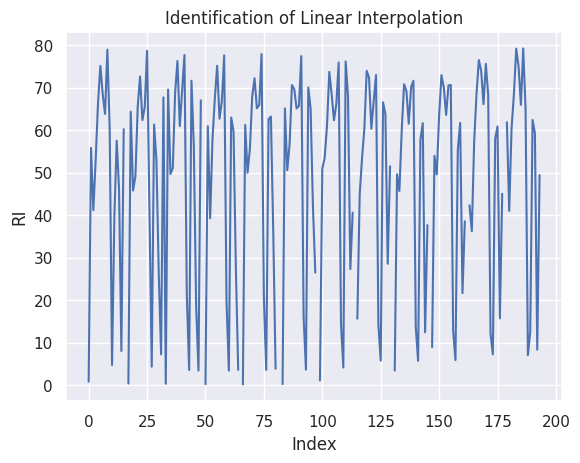

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 선형 보간된 부분을 식별하는 함수 정의
def identify_linear_interpolation(df, column):
    # 결측치를 포함하는 부분을 찾습니다.
    missing_values = df[df[column].isnull()]

    # 결측치를 보간하여 데이터프레임의 인덱스를 유지합니다.
    linear_interpolated_values = missing_values.interpolate(method='linear', limit_direction='both')

    # 선형 보간된 값을 시각화합니다.
    plt.plot(df.index, df[column], label='Original Data')
    plt.scatter(linear_interpolated_values.index, linear_interpolated_values[column], color='red', label='Linear Interpolation')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title('Identification of Linear Interpolation')
    plt.show()

# 예시 데이터를 사용하여 함수 호출
identify_linear_interpolation(Cobalt_RiskIndex_filled, 'RI')


**월별로 규칙성찾기**

In [ ]:
# 각 월별로 규칙성을 분석하는 함수 정의
def analyze_monthly_patterns(df):
    # 'Period' 열을 datetime 형식으로 변환하여 연도와 월을 추출합니다.
    df['Period'] = pd.to_datetime(df['Period'])
    df['Year'] = df['Period'].dt.year
    df['Month'] = df['Period'].dt.month

    # 각 월별 통계량을 저장할 데이터프레임 생성
    results = pd.DataFrame(columns=['Month', 'Mean', 'Median', 'Standard Deviation'])

    # 월별로 데이터를 그룹화하여 분석합니다.
    for month in range(1, 13):
        month_data = df[df['Month'] == month]

        # 해당 월에 데이터가 있는지 확인합니다.
        if not month_data.empty:
            month_stats = {
                'Month': month,
                'Mean': month_data['RI'].mean(), #평균
                'Median': month_data['RI'].median(), #중앙값
                'Standard Deviation': month_data['RI'].std() #표준편차
            }
            results = pd.concat([results, pd.DataFrame([month_stats])], ignore_index=True)

    return results

# 예시 데이터를 사용하여 함수 호출
monthly_patterns = analyze_monthly_patterns(Cobalt_RiskIndex_filled)
monthly_patterns

,Month,Mean,Median,Standard Deviation
0,1,48.738917,56.652430,24.450560
1,2,47.867392,57.133478,25.255379
2,3,47.835134,58.661371,28.274851
3,4,45.672420,59.757914,27.543127
4,5,47.061439,61.213214,27.053008
5,6,49.594334,65.003865,25.799838
6,7,49.559147,60.912815,26.016393
7,8,50.064027,60.301682,23.090803
8,9,46.050535,57.748592,25.192675
9,10,47.955459,55.331530,24.197946


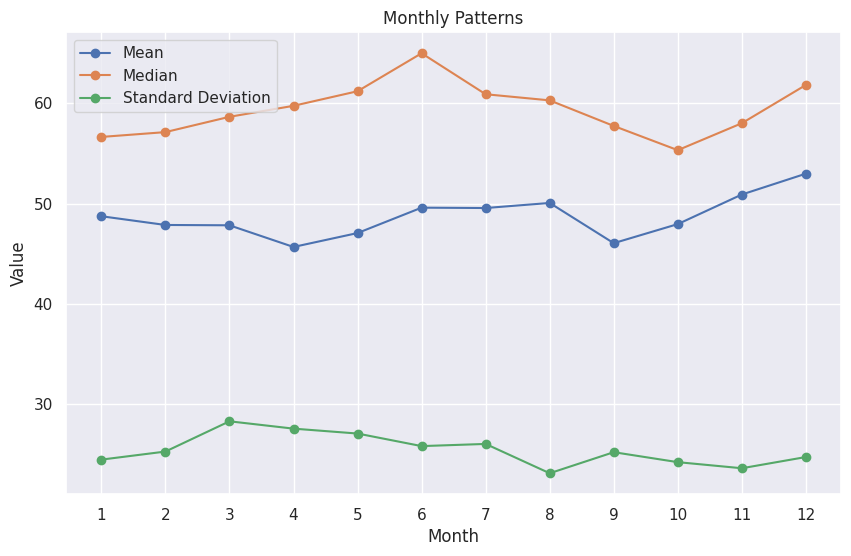

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))

plt.plot(monthly_patterns['Month'], monthly_patterns['Mean'], marker='o', label='Mean')
plt.plot(monthly_patterns['Month'], monthly_patterns['Median'], marker='o', label='Median')
plt.plot(monthly_patterns['Month'], monthly_patterns['Standard Deviation'], marker='o', label='Standard Deviation')

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Patterns')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# 각 일별로 규칙성을 분석하는 함수 정의
def analyze_daily_patterns(df):
    # 'Period' 열을 datetime 형식으로 변환하여 연도, 월, 일을 추출합니다.
    df['Period'] = pd.to_datetime(df['Period'])
    df['Day'] = df['Period'].dt.day

    # NaN 값이 있는 행 제거
    df.dropna(subset=['RI'], inplace=True)

    # 일별로 데이터를 그룹화하여 분석합니다.
    daily_patterns = df.groupby('Day')['RI'].agg(['mean', 'median', 'std'])

    # 변동 계산을 위해 일별 최대값과 최소값 추가
    daily_patterns['max'] = df.groupby('Day')['RI'].max()
    daily_patterns['min'] = df.groupby('Day')['RI'].min()

    return daily_patterns

# 예시 데이터를 사용하여 함수 호출
daily_patterns = analyze_daily_patterns(Cobalt_RiskIndex_filled)
daily_patterns

,mean,median,std,max,min
Day,,,,,
8,11.302724,0.991844,20.046719,61.83953,0.187337
9,54.446994,54.871558,10.305761,69.514465,36.230045
10,49.669127,49.814461,6.121896,60.361549,39.273334
11,58.70518,58.937906,6.151221,68.430984,49.0892
12,71.115923,70.672502,4.198170,79.12591,65.542974
13,72.479865,72.48069,2.657902,76.234813,68.427433
14,63.687137,63.103238,2.448791,68.440587,60.303523
15,68.758313,66.831578,4.559390,79.181995,63.777864
16,74.361148,76.636694,4.591621,78.89754,65.000153


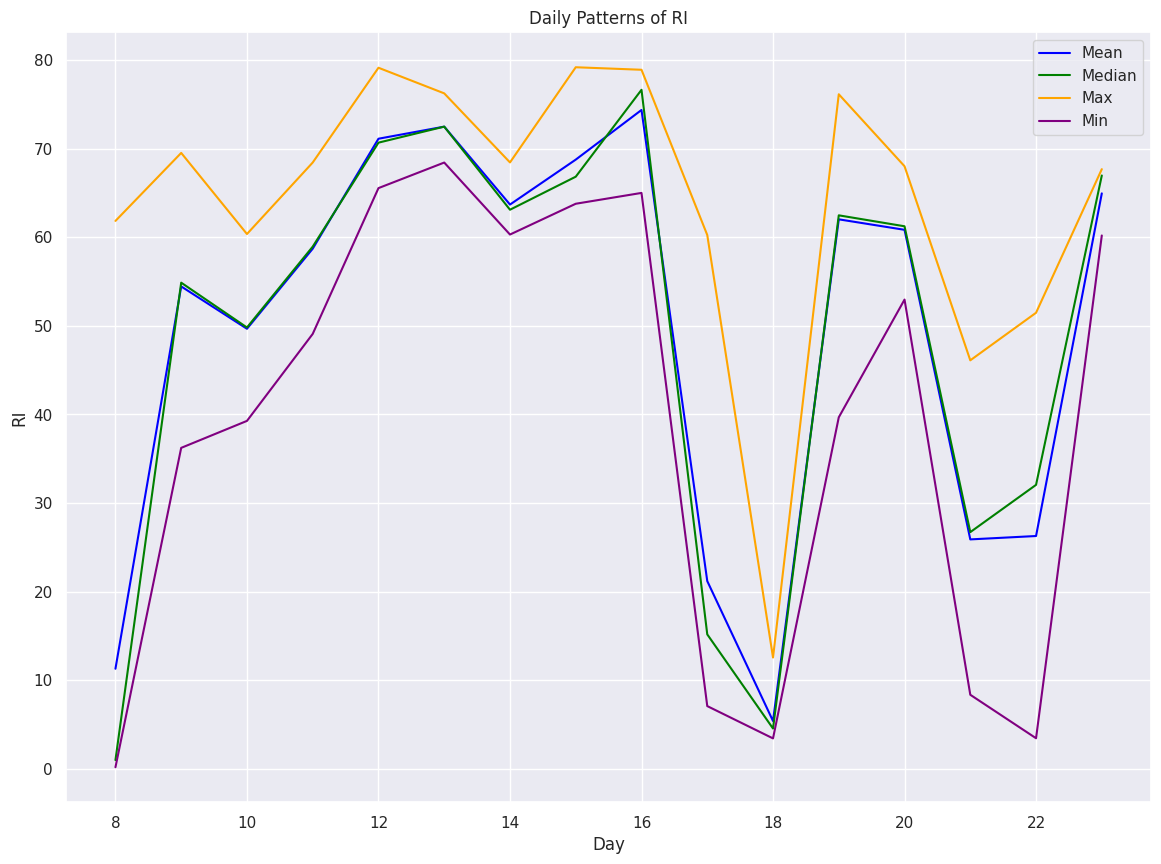

In [ ]:
# 일별 통계량 시각화
plt.figure(figsize=(14, 10))

# 평균
plt.plot(daily_patterns.index, daily_patterns['mean'], label='Mean', color='blue')
# 중앙값
plt.plot(daily_patterns.index, daily_patterns['median'], label='Median', color='green')
# 표준편차
# plt.plot(daily_patterns.index, daily_patterns['std'], label='Standard Deviation', color='red')
# 최대값
plt.plot(daily_patterns.index, daily_patterns['max'], label='Max', color='orange')
# 최소값
plt.plot(daily_patterns.index, daily_patterns['min'], label='Min', color='purple')

plt.xlabel('Day')
plt.ylabel('RI')
plt.title('Daily Patterns of RI')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 각 일별로 규칙성을 분석하는 함수 정의
def analyze_daily_patterns(df):
    # 'Period' 열을 datetime 형식으로 변환하여 연도, 월, 일을 추출합니다.
    df['Period'] = pd.to_datetime(df['Period'])
    df['Day'] = df['Period'].dt.day

    # NaN 값이 있는 행 제거
    df.dropna(subset=['RI'], inplace=True)

    # 일별로 데이터를 그룹화하여 분석합니다.
    daily_patterns = df.groupby('Day')['RI'].agg(['mean', 'median', 'std'])

    # 변동 계산을 위해 일별 최대값과 최소값 추가
    daily_patterns['max'] = df.groupby('Day')['RI'].max()
    daily_patterns['min'] = df.groupby('Day')['RI'].min()

    # 이동평균 계산 및 추가
    window_size = 3  # 이동평균 윈도우 크기
    daily_patterns['moving_average'] = daily_patterns['mean'].rolling(window=window_size).mean()

    return daily_patterns

# 예시 데이터를 사용하여 함수 호출
daily_patterns = analyze_daily_patterns(Cobalt_RiskIndex_filled)
daily_patterns

,mean,median,std,max,min,moving_average
Day,,,,,,
8,11.302724,0.991844,20.046719,61.83953,0.187337,NaN
9,54.446994,54.871558,10.305761,69.514465,36.230045,NaN
10,49.669127,49.814461,6.121896,60.361549,39.273334,38.472948
11,58.70518,58.937906,6.151221,68.430984,49.0892,54.273767
12,71.115923,70.672502,4.198170,79.12591,65.542974,59.830077
13,72.479865,72.48069,2.657902,76.234813,68.427433,67.433656
14,63.687137,63.103238,2.448791,68.440587,60.303523,69.094309
15,68.758313,66.831578,4.559390,79.181995,63.777864,68.308438
16,74.361148,76.636694,4.591621,78.89754,65.000153,68.935533


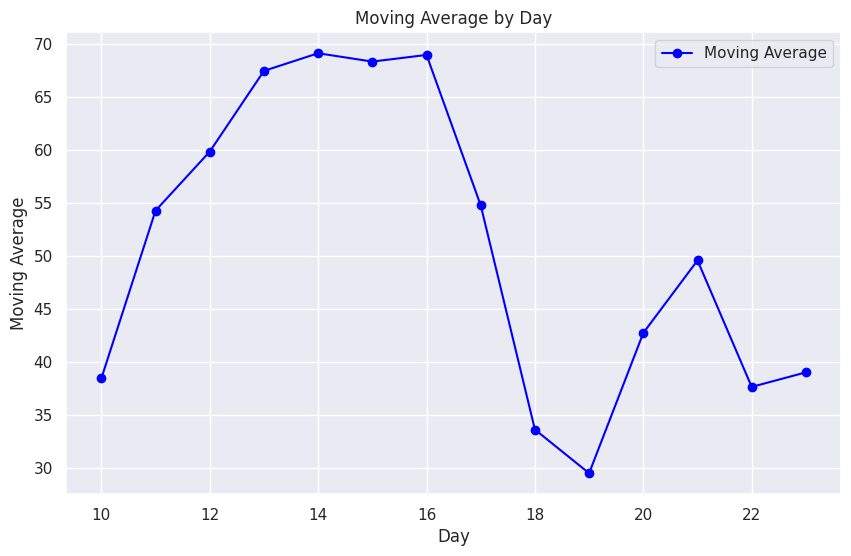

In [ ]:
import matplotlib.pyplot as plt

# NaN 값이 있는 행 제거
daily_patterns.dropna(subset=['moving_average'], inplace=True)

# moving_average 시각화
plt.figure(figsize=(10, 6))
plt.plot(daily_patterns.index, daily_patterns['moving_average'], marker='o', color='blue', label='Moving Average')
plt.xlabel('Day')
plt.ylabel('Moving Average')
plt.title('Moving Average by Day')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
scaler = StandardScaler()

# 표준화할 열 선택
columns_to_standardize = ['mean', 'median', 'std', 'max', 'min', 'moving_average']

# 데이터 표준화
daily_patterns[columns_to_standardize] = scaler.fit_transform(daily_patterns[columns_to_standardize])

# 표준화된 데이터 출력
daily_patterns

,mean,median,std,max,min,moving_average
Day,,,,,,
10,-0.098980,-0.097847,-0.161096,-0.197405,-0.107092,-0.910618
11,0.318432,0.315110,-0.155203,0.268730,0.292992,0.242106
12,0.891734,0.846255,-0.547689,0.886529,0.963631,0.647459
13,0.954740,0.928100,-0.857222,0.719523,1.081198,1.202166
14,0.548568,0.503646,-0.899245,0.269285,0.750076,1.323317
15,0.782826,0.672403,-0.475098,0.889769,0.891687,1.265985
16,1.041644,1.116214,-0.468621,0.873337,0.941506,1.311733
17,-1.414203,-1.665428,1.633207,-0.203923,-1.418856,0.278476
18,-2.143697,-2.146334,-0.877379,-2.957996,-1.567523,-1.262128


**K-mean모델을 활용해 모델 훈련을 하고 클러스터링**

In [ ]:
from sklearn.cluster import KMeans

# K-means 모델 생성
kmeans = KMeans(n_clusters=3, random_state=42)

# 모델 훈련
kmeans.fit(daily_patterns)

# 클러스터링 결과 확인
cluster_labels = kmeans.labels_
cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2], dtype=int32)

**결과** :

1.   클러스터 1(데이터 분포가 오른쪽)
*   평균 : 0.84
*   중간값 : 0.81
*   표준편차 : -0.65
*   최대값 : 0.73
*   최소값 : 0.93
*   이동평균 : 1.15

2.   클러스터 2(분산 큼)
*   평균 : -1.48
*   중간값 : -1.46
*   표준편차 : 1.06
*   최대값 : -1.22
*   최소값 : -1.48
*   이동평균 : -0.51

3.   클러스터 3(분산이 작음)
*   평균 : 0.34
*   중간값 : 0.36
*   표준편차 : -0.19
*   최대값 : 0.25
*   최소값 : 0.26
*   이동평균 : -0.74

In [ ]:
import seaborn as sns

# 표준화된 데이터에 대한 상관계수 행렬 구하기
correlation_matrix = daily_patterns.corr()

# 각 열과 다른 열 사이의 상관계수 출력
pd.DataFrame(correlation_matrix)
correlation_matrix

,mean,median,std,max,min,moving_average
mean,1.000000,0.993898,-0.541386,0.900082,0.966721,0.502603
median,0.993898,1.000000,-0.511686,0.880092,0.950325,0.461536
std,-0.541386,-0.511686,1.000000,-0.185302,-0.709494,-0.328747
max,0.900082,0.880092,-0.185302,1.000000,0.799862,0.523018
min,0.966721,0.950325,-0.709494,0.799862,1.000000,0.565035
moving_average,0.502603,0.461536,-0.328747,0.523018,0.565035,1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 0.84390236  0.81332342 -0.64957507  0.72768877  0.9256197   1.15013187]
 [-1.4835493  -1.46414074  1.05526222 -1.22333348 -1.47999805 -0.51314385]
 [ 0.34293708  0.35798917 -0.19463471  0.25097802  0.25837873 -0.73961679]]

Cluster Statistics:
             mean                                  median                      \
             mean       std       min       max      mean       std       min   
cluster                                                                         
0        0.843902  0.190149  0.548568  1.041644  0.813323  0.235457  0.503646   
1       -1.483549  0.452874 -2.143697 -1.179324 -1.464141  0.555378 -2.146334   
2        0.342937  0.268109 -0.098980  0.606821  0.357989  0.287148 -0.097847   

                        std            ...       max                 min  \
              max      mean       std  ...       min       max      mean   
cluster                                ...                                 
0        1.116214 -0.

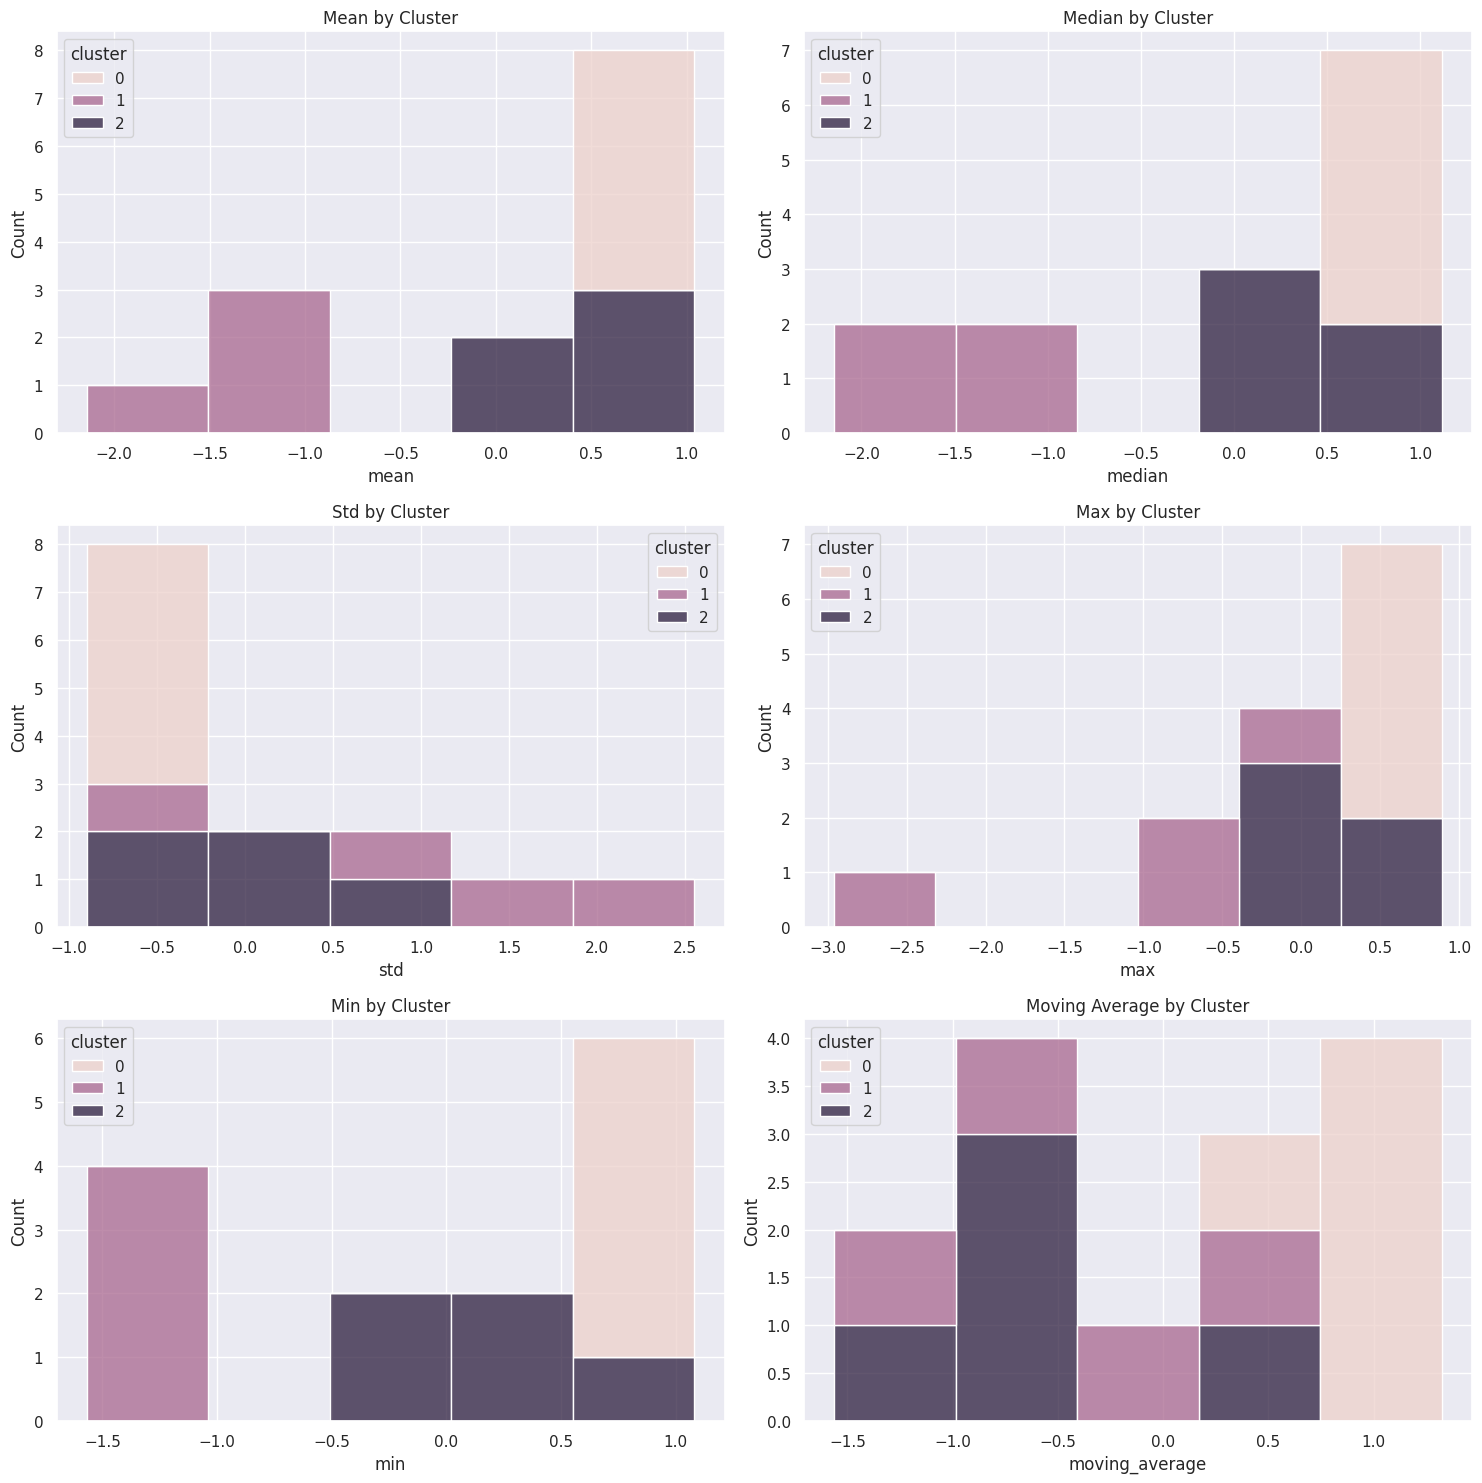

Cluster 0 Center:
  mean: 0.8439023598870403
  median: 0.8133234233758839
  std: -0.6495750671219279
  max: 0.7276887670873536
  min: 0.9256197045038312
  moving_average: 1.1501318671657892

Cluster 1 Center:
  mean: -1.4835493013550407
  median: -1.464140743513456
  std: 1.0552622248168848
  max: -1.2233334830113722
  min: -1.4799980486153688
  moving_average: -0.5131438510206168

Cluster 2 Center:
  mean: 0.34293708119699146
  median: 0.35798917143488124
  std: -0.19463471273158037
  max: 0.25097801932174485
  min: 0.25837873438846315
  moving_average: -0.7396167863492944



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# K-means 모델 생성 및 훈련
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(daily_patterns)

# 클러스터링 결과 확인
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# 클러스터 레이블을 원본 데이터프레임에 추가
daily_patterns['cluster'] = cluster_labels

# 각 클러스터별 통계 분석
cluster_stats = daily_patterns.groupby('cluster').agg({
    'mean': ['mean', 'std', 'min', 'max'],
    'median': ['mean', 'std', 'min', 'max'],
    'std': ['mean', 'std', 'min', 'max'],
    'max': ['mean', 'std', 'min', 'max'],
    'min': ['mean', 'std', 'min', 'max'],
    'moving_average': ['mean', 'std', 'min', 'max']
})

print("Cluster Centers:")
print(cluster_centers)

print("\nCluster Statistics:")
print(cluster_stats)

# 클러스터별 데이터 분포 시각화
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# mean
sns.histplot(data=daily_patterns, x='mean', hue='cluster', multiple='stack', ax=axs[0, 0])
axs[0, 0].set_title('Mean by Cluster')

# median
sns.histplot(data=daily_patterns, x='median', hue='cluster', multiple='stack', ax=axs[0, 1])
axs[0, 1].set_title('Median by Cluster')

# std
sns.histplot(data=daily_patterns, x='std', hue='cluster', multiple='stack', ax=axs[1, 0])
axs[1, 0].set_title('Std by Cluster')

# max
sns.histplot(data=daily_patterns, x='max', hue='cluster', multiple='stack', ax=axs[1, 1])
axs[1, 1].set_title('Max by Cluster')

# min
sns.histplot(data=daily_patterns, x='min', hue='cluster', multiple='stack', ax=axs[2, 0])
axs[2, 0].set_title('Min by Cluster')

# moving_average
sns.histplot(data=daily_patterns, x='moving_average', hue='cluster', multiple='stack', ax=axs[2, 1])
axs[2, 1].set_title('Moving Average by Cluster')

plt.tight_layout()
plt.show()

# 클러스터별 유사점과 차이점 분석
def analyze_clusters(cluster_centers):
    features = ['mean', 'median', 'std', 'max', 'min', 'moving_average']
    for i, center in enumerate(cluster_centers):
        print(f"Cluster {i} Center:")
        for j, feature in enumerate(features):
            print(f"  {feature}: {center[j]}")
        print()

analyze_clusters(cluster_centers)

클러스터 0: 전반적으로 높은 평균과 중앙값, 낮은 변동성, 높은 이동평균.

클러스터 1: 전반적으로 낮은 평균과 중앙값, 높은 변동성, 낮은 이동평균.

클러스터 2: 중간 정도의 평균과 중앙값, 약간 낮은 변동성, 낮은 이동평균.

**클러스터 0**

<의미>

안정적인 고위험 구간: 코발트 시장에서 상대적으로 높은 위험지수를 유지하는 안정적인 구간.

높은 시장활동: 이 구간은 시장 활동이 활발하며, 가격 변동성이 낮아 예측 가능성이 높음.

<전략>

가격 안정화: 이 구간에서 가격을 유지하기 위한 안정화 전략을 수립.

장기 계약: 안정적인 시장 상황을 이용한 장기 계약 및 고정 가격 협상.

**클러스터 1**

<의미>

높은 불확실성 구간: 코발트 시장에서 큰 변동성을 보이는 구간.

위험 관리 필요: 이 구간에서는 예측이 어려운 시장 상황이 발생.

<전략>

위험 회피 전략: 변동성이 큰 시기에는 헤징 및 리스크 관리 전략 강화.

시장 모니터링: 실시간 모니터링 및 빠른 대응 체계 구축.

**클러스터2**

<의미>

안정적인 저위험 구간: 코발트 시장에서 낮은 위험지수를 유지하는 안정적인 구간.

보수적 시장활동: 이 구간은 시장 활동이 상대적으로 보수적이며, 안정적인 수급 상황을 반영.

<전략>

유지 전략: 현재의 안정적인 시장 상황을 유지하기 위한 전략 수립.

비용 절감: 안정적인 구간을 이용한 비용 절감 및 효율성 극대화.